<h1><center>Análisis de Sistemas de Infraestructura <br>
    Taller: Modelos de deterioro <br>
    Parte 1 (puntos 1 y 2)</center></h1>

Importamos las librerias a utilizar...

In [1]:
import pandas as pd #Libreria para manejo de datos y estadistica
import matplotlib.pyplot as plt # importar librería de matplotlib
import numpy as np
import math
import sympy as sym
from sympy import integrate
import scipy as sp
import scipy.stats as ss
from scipy.stats import gamma
import decimal
import seaborn as sns
decimal.getcontext().prec = 5
%matplotlib inline

<h4> 1. Considere un sistema cuyo estado inicial es $v_0=100$ y para el cual la falla ocurre para valores de $V(t)\leq20$. Suponga que el sistema sujeto a deterioro progresivo únicamente. La función de deterioro tiene la siguiente forma: $D_p(t)=t^{\alpha}$ para un valor de $\alpha$ seleccionado. El parámetro $\alpha$ puede modelarse suponiendo que sigue una distribución uniforme o una distribución normal. <\h4>

<h5> Para el caso en que $\alpha$ sigue una distribución uniforme definida entre $[0.5; q]$ con $q$ variando en intervalos de 0.5 entre $[1, 5]$. Dibuje una figura de MTTF vs $q$np.random.uniform(0.5,q) <\h5>

     q        MTTF
0  1.0  953.504880
1  1.5  512.114899
2  2.0  328.031007
3  2.5  241.730661
4  3.0  201.685484
5  3.5  178.658130
6  4.0  140.792461
7  4.5  126.250117
8  5.0  107.133203


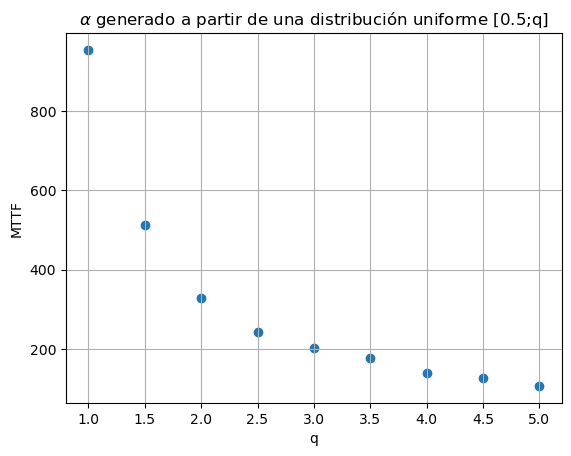

In [2]:
q=1
t_falla=np.zeros(10000)
MTTF={}

#uniforme

while q<=5:
    
    for i in range(0,10000):
        alpha=np.random.uniform(0.5,q)
        t=(80)**(1/alpha)
        t_falla[i]=t
    suma=np.sum(t_falla)
    MTTF[q]=suma/10000
    
    q+=0.5

MTTF = pd.DataFrame([[key, MTTF[key]] for key in MTTF.keys()], columns=['q', 'MTTF'])
plt.scatter(MTTF['q'],MTTF['MTTF'])
plt.xlabel("q") # Establecer el título del eje x
plt.ylabel("MTTF") # Establecer el título del eje y
plt.title(r'$\alpha$ generado a partir de una distribución uniforme [0.5;q]')
plt.grid()
print(MTTF)

<h5> Para el caso en que $\alpha$ está distribuida normalmente; varíe el valor de $\mu_{\alpha}$ en [0.5; 5]; con coeficiente de variación de 10%. Dibuje una figura de MTTF vs $\mu_{\alpha}$. <\h5>

   mean          MTTF
0   0.5  12152.367184
1   1.0     94.031126
2   1.5     20.118188
3   2.0      9.372974
4   2.5      5.969140
5   3.0      4.444617
6   3.5      3.569269
7   4.0      3.041143
8   4.5      2.690856
9   5.0      2.431735


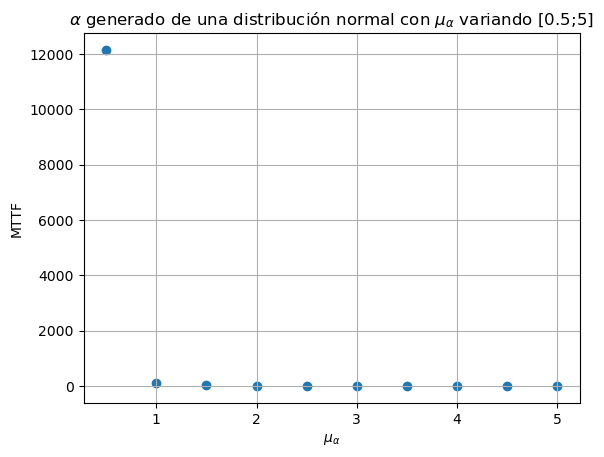

In [3]:
media=0.5
cov=10/100
t_falla_normal=np.zeros(10000)
MTTF_normal={}
suma=0

#Normal

while media<=5:
    
    desv=media*cov
    t_falla_normal=np.zeros(10000)
    for i in range(0,10000):
        alpha=np.random.normal(media,desv)
        t=(80)**(1/alpha)
        t_falla_normal[i]=t
    suma=np.sum(t_falla_normal)
    MTTF_normal[media]=suma/10000
    
    media+=0.5

MTTF_normal = pd.DataFrame([[key, MTTF_normal[key]] for key in MTTF_normal.keys()], columns=['mean', 'MTTF'])
plt.scatter(MTTF_normal['mean'],MTTF_normal['MTTF'])
plt.xlabel(r'$\mu_{\alpha}$') # Establecer el título del eje x
plt.ylabel("MTTF") # Establecer el título del eje y
plt.title(r'$\alpha$ generado de una distribución normal con $\mu_{\alpha}$ variando [0.5;5]')
plt.grid()
print(MTTF_normal)

<h4> 2. Dibuje dos realizaciones, de dos procesos gamma, con el mismo factor de escala $u=1.5$; pero con factor de forma $v(t)=0.0055t^2$ y $v(t)=5.5t^{0.5}$. La ventana de tiempo para la gráfica es de 120 años (Nota: la condición inicial del sistema es de $v_0=100$). Si el estado límite de servicio es de $k^*=35$, dibuje la distribución del tiempo a la falla y calcule el valor esperado; Cómo se compara este valor con el valor obtenido directamente de la función de forma?. Analice y concluya. (Nota: La distribución del tiempo a la falla la pueden calcular utilizando simulación; i.e., para cada realización registran el tiempo en el que el sistema falla y repiten el proceso muchas veces.) <\h4>

In [4]:
#calculo de delta v para la función 1

delta_v={}
t=0
i=0

while t<120:
    
    vt=0.0055*(t)**2
    vs=0.0055*(t+2.4)**2
    delta_v[i]=vs-vt
    i=i+1
    t+=2.4

In [5]:
#calculo de delta v para la función 2

delta_v2={}
t=0
i=0

while t<120:
    vt=5.5*(t)**0.5
    vs=5.5*(t+2.4)**0.5
    delta_v2[i]=vs-vt
    i=i+1
    t+=2.4

In [6]:
#Función para hallar deltai función 1

def deltai (i):
    deltai=gamma.rvs(delta_v[i],1/1.5)
    return(deltai)

In [7]:
#Función para hallar deltai función 2

def deltai2 (i):
    deltai2=gamma.rvs(delta_v2[i],1/1.5)
    return(deltai2)

In [8]:
# Creación del diccionario de tiempo

tiempo={}
tiempo[0]=0
n=1
i=1

while n<100:
    tiempo[n]=i*2.4
    tiempo[n+1]=i*2.4
    i=i+1
    n+=2
    
# Creación de la realización 1 de la función 1
v={}
v[0]=100
v[1]=100
n=2
i=0

while n<=100:
    
    v[n]=v[n-1]-deltai(i)
    
    if n!=100:
        
        v[n+1]=v[n]
        
    i=i+1
    n+=2

# Creación de la realización 2 de la función 1

v2={}
v2[0]=100
v2[1]=100
n=2
i=0

while n<=100:
    
    v2[n]=v2[n-1]-deltai(i)
    
    if n!=100:
        
        v2[n+1]=v2[n]
        
    i=i+1
    n+=2

# Creación de la realización 1 de la función 2

v3={}
v3[0]=100
v3[1]=100
n=2
i=0

while n<=100:
    v3[n]=v3[n-1]-deltai2(i)
    if n!=100:
        v3[n+1]=v3[n]
    i=i+1
    n+=2

# Creación de la realización 2 de la función 2

v4={}
v4[0]=100
v4[1]=100
n=2
i=0

while n<=100:
    
    v4[n]=v4[n-1]-deltai2(i)
    
    if n!=100:
        
        v4[n+1]=v4[n]
        
    i=i+1
    n+=2

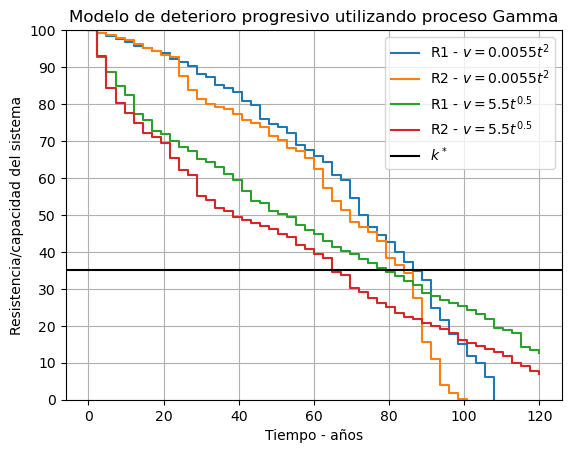

In [9]:
# Creación de DataFrame para la realización 1 de la función 1
v = pd.DataFrame([[key, v[key]] for key in v.keys()], columns=['key', 'v'])
v.set_index('key',inplace=True)

# Creación de DataFrame para la realización 2 de la función 1
v2 = pd.DataFrame([[key, v2[key]] for key in v2.keys()], columns=['key', 'v2'])
v2.set_index('key',inplace=True)

# Creación de DataFrame para la realización 2 de la función 2
v3 = pd.DataFrame([[key, v3[key]] for key in v3.keys()], columns=['key', 'v3'])
v3.set_index('key',inplace=True)

# Creación de DataFrame para la realización 2 de la función 1
v4 = pd.DataFrame([[key, v4[key]] for key in v4.keys()], columns=['key', 'v4'])
v4.set_index('key',inplace=True)

# Creación de DataFrame para el tiempo
tiempo = pd.DataFrame([[key, tiempo[key]] for key in tiempo.keys()], columns=['key', 'tiempo'])
tiempo.set_index('key',inplace=True)
tiempo

#Unión de las realizaciones en un DataFrame
realizacion=pd.merge(tiempo, v, on='key')
realizacion=pd.merge(realizacion, v2, on='key')
realizacion=pd.merge(realizacion, v3, on='key')
realizacion=pd.merge(realizacion, v4, on='key')
realizacion

#Grafica
plt.plot(realizacion['tiempo'],realizacion['v'],label=r"R1 - $v=0.0055t^2$")
plt.plot(realizacion['tiempo'],realizacion['v2'],label=r"R2 - $v=0.0055t^2$")
plt.plot(realizacion['tiempo'],realizacion['v3'],label=r"R1 - $v=5.5t^{0.5}$")
plt.plot(realizacion['tiempo'],realizacion['v4'],label=r"R2 - $v=5.5t^{0.5}$")
plt.axhline(35,label=r'$k^*$',c='black')
plt.xlabel("Tiempo - años") # Establecer el título del eje x
plt.ylabel("Resistencia/capacidad del sistema") # Establecer el título del eje y
plt.title('Modelo de deterioro progresivo utilizando proceso Gamma')
y=[0,10,20,30,40,50,60,70,80,90,100]
plt.yticks(np.arange(min(y), max(y)+1, 10))
plt.ylim(0,100)
plt.grid()

plt.legend(loc='best')

In [10]:
#Cálculo del tiempo a la falla por simulación funcion de forma 1
fallas=np.zeros(10000)
for n_simulaciones in range (0,1000):
    deterioro=np.zeros(50)
    tiempo_f=0
    i=0
    while i<=49:
        deterioro[i]=deltai(i)
        if np.sum(deterioro)>=65:
            break
        i+=1
        tiempo_f=tiempo_f+2.4
    fallas[n_simulaciones]=tiempo_f

TMF=np.sum(fallas)/1000

# Cálculo del tiempo a la falla por la función de forma
TF=(65/0.0055)**(1/2)

In [11]:
print('El tiempo medio a la falla es:', round(TMF,2), 'años')
print('El tiempo a la falla por la función de forma es:', round(TF,2), 'años')

El tiempo medio a la falla es: 85.35 años
El tiempo a la falla por la función de forma es: 108.71 años


In [12]:
#Cálculo del tiempo a la falla por simulación funcion de forma 2
fallas2=np.zeros(10000)
for n_simulaciones in range (0,1000):
    deterioro2=np.zeros(50)
    tiempo_f2=0
    i=0
    while i<=49:
        deterioro2[i]=deltai2(i)
        if np.sum(deterioro2)>=65:
            break
        i+=1
        tiempo_f2=tiempo_f2+2.4
    fallas2[n_simulaciones]=tiempo_f2

TMF=np.sum(fallas2)/1000

# Cálculo del tiempo a la falla por la función de forma
TF=(65/5.5)**(2)

In [13]:
print('El tiempo medio a la falla es:', round(TMF,2), 'años')
print('El tiempo a la falla por la función de forma es:', round(TF,2), 'años')

El tiempo medio a la falla es: 68.54 años
El tiempo a la falla por la función de forma es: 139.67 años
